In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### EDA

### Customer segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

In [38]:
data = pd.read_csv('../../data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
X = data.drop('CustomerID',axis=1)

In [40]:
X = pd.get_dummies(X).astype(int)

In [41]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


### KMeans

k: 1  wcss: 308911.34
k: 2  wcss: 212938.71508951404
k: 3  wcss: 143440.43314900764
k: 4  wcss: 104463.19922884133
k: 5  wcss: 75448.45165554191
k: 6  wcss: 58396.83940503942
k: 7  wcss: 51213.38152958153
k: 8  wcss: 44437.297953697955
k: 9  wcss: 40718.61445260166
k: 10  wcss: 37249.381961907835
k: 11  wcss: 34718.5454269294
k: 12  wcss: 32019.0420995671
k: 13  wcss: 30099.56871630084
k: 14  wcss: 28075.373133991627
k: 15  wcss: 26830.37590973935
k: 16  wcss: 24498.40504773005
k: 17  wcss: 23490.82671495172
k: 18  wcss: 22119.41095669037
k: 19  wcss: 20823.992708272126
k: 20  wcss: 20090.84751488622
k: 21  wcss: 18851.735816960823
k: 22  wcss: 18367.73098355892
k: 23  wcss: 16725.247924297924
k: 24  wcss: 16922.179094516596
k: 25  wcss: 15992.48537989788
k: 26  wcss: 15509.690662931838
k: 27  wcss: 14794.367338217337
k: 28  wcss: 13912.2249613132
k: 29  wcss: 13243.115864690866


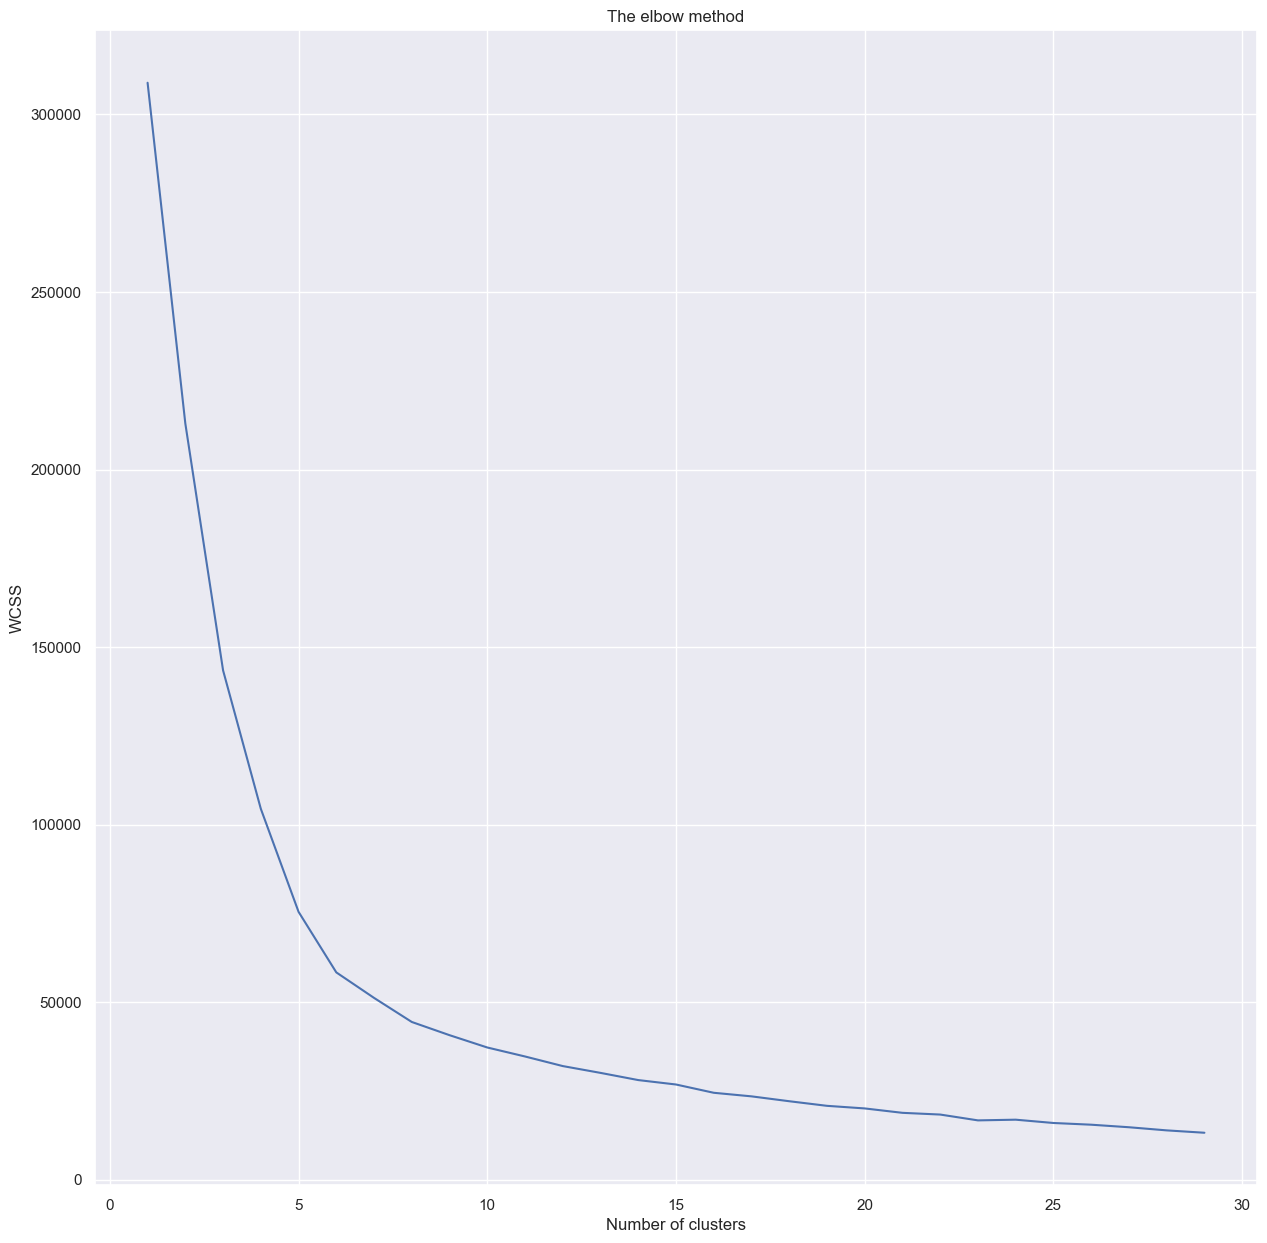

In [43]:
### Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the sum of diff between centroid and corrsponding datapoint
    print('k:',i," wcss:",kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 30), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [45]:
data['Cluster'] = y_kmeans
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


### Plotting

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

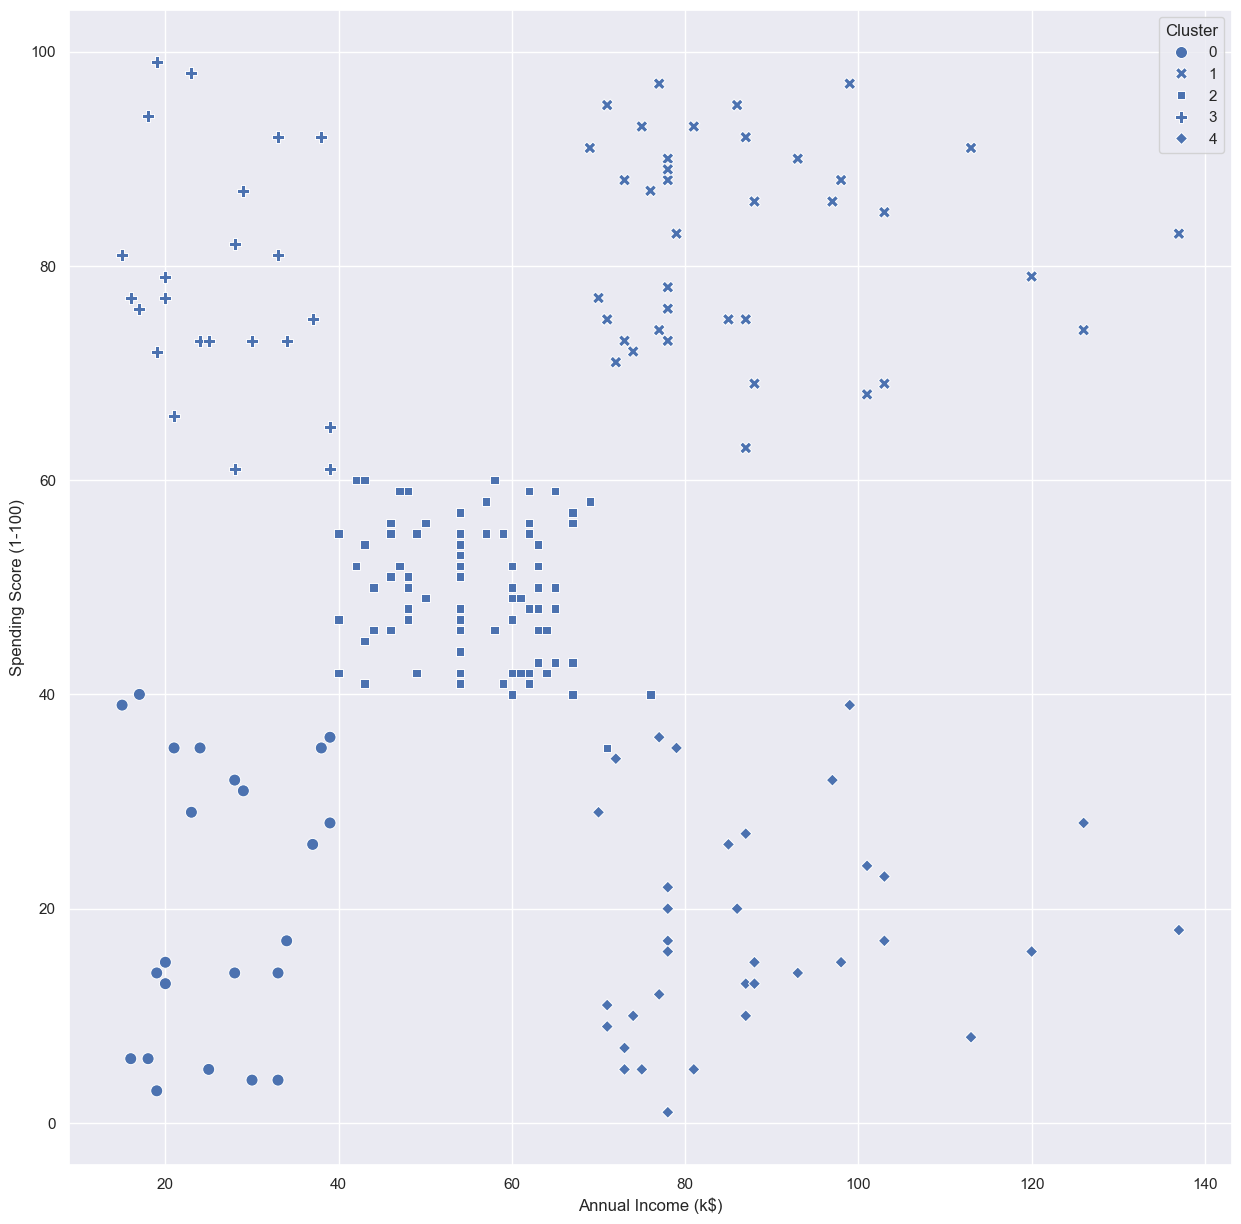

In [47]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",style='Cluster',s=75)

In [48]:
#END